# Import libraries

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim


# Building Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import History
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, GRU
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import data

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [7]:
data.shape, test.shape

((20800, 5), (5200, 4))

# Preprocessing data and analysis

## Drop unnecessary columns (id, author)

In [8]:
def drop_col(data):
    for col in ["id", "author"]: data.drop(col, axis=1, inplace=True)

    return data

data = drop_col(data)
test = drop_col(test)

In [9]:
data.head(2)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0


In [10]:
data["title"].value_counts()

Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence              5
The Dark Agenda Behind Globalism And Open Borders                                                               5
Schools All Over America Are Closing On Election Day Due To Fears Of Violence                                   4
“If Trump Loses, I’m Grabbing My Musket”: Former Congressman Ready to Go Full Revolution                        4
Public vs. Media on War                                                                                         4
                                                                                                               ..
Report: Only 6% of Millennials Said Their Social Media Was a ’Completely True’ Depiction of Them - Breitbart    1
Hillary Clinton, Donald Trump, Iraq Inquiry: Your Wednesday Evening Briefing - The New York Times               1
Shall We Save Civilization, or Not? - American Herald Tribune                           

##  Filling some data

In [11]:
data.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [12]:
test.isnull().sum()

title    122
text       7
dtype: int64

In [13]:
data[data["text"].isnull()]

,title,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,1


In [14]:
test[test["text"].isnull()]

,title,text
589,[Vidéo] Que trouve-t-on dans « Le Gorafi de l’...,NaN
626,Nous avons comparé les programmes d’Alain Jupp...,NaN
978,« J’y crois encore ! » par Alain Juppé en trai...,NaN
2257,Horoscope du 14 novembre 2016 >> Le Gorafi,NaN
2892,Une fan demande le remboursement de son tatoua...,NaN
4736,Révélations – François Fillon serait de droite...,NaN
5092,Des traces de vin rouge détectées dans le Beau...,NaN


In [15]:
def fill_data(data):
    data["title"] = data["title"].fillna("No Title")
    data["text"] = data["text"].fillna("No text")
    return data

data = fill_data(data)
test = fill_data(test)

In [16]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [17]:
test.isnull().sum()

title    0
text     0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20800 non-null  object
 1   text    20800 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 487.6+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5200 non-null   object
 1   text    5200 non-null   object
dtypes: object(2)
memory usage: 81.4+ KB


In [20]:
data["new_text"] = data["title"] + " " + data["text"]
test["new_text"] = test["title"] + " " + test["text"]

In [21]:
data.head()

,title,text,label,new_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [22]:
test.head()

,title,text,new_text
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...


## Remove noises and lower the words

In [23]:
def remove_special_chars(x):
    if isinstance(x, str):
        x = re.sub(r'[^\w\s]', '', x)
        x = x.replace("_", " ")
        x = ' '.join(x.split())
    return x

In [24]:
data['new_text'] = data['new_text'].apply(lambda x: str(x).lower())
test['new_text'] = test['new_text'].apply(lambda x: str(x).lower())

In [25]:
data['new_text'] = data['new_text'].apply(lambda x: remove_special_chars(x))
test['new_text'] = test['new_text'].apply(lambda x: remove_special_chars(x))

## Balancing of the data

([<matplotlib.patches.Wedge at 0x78013d3d2020>,
 [Text(-1.1999976867063213, -0.0023562469051224867, 'Unreliable'),
  Text(1.1999976867063213, 0.0023562469051218067, 'Reliable')],
 [Text(-0.6999986505786873, -0.0013744773613214504, '50.1%'),
  Text(0.6999986505786873, 0.0013744773613210536, '49.9%')])

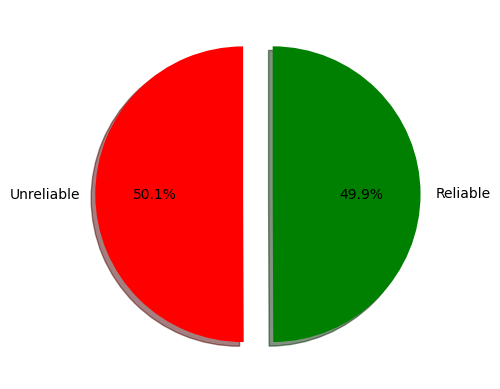

In [26]:
label_size = [data['label'].sum(), len(data['label'])-data['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1], colors=['red','green'], startangle=90, shadow=True, labels=['Unreliable','Reliable'], autopct='%1.1f%%')

# NLTK

In [27]:
y = data['label'].values

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
X = data['new_text'].apply(lambda x: word_tokenize(str(x)))

In [30]:
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=100, window=10, min_count=1)

In [31]:
w2v_model.wv['woman']

array([ 1.0658867 ,  0.23044416, -0.72437626, -4.7786345 ,  0.3316006 ,
        0.2808974 , -1.4562696 , -0.7149362 , -0.13227195, -1.9090729 ,
        1.0232025 , -2.5365362 , -2.3850389 , -0.2867016 ,  0.6834763 ,
       -0.59176797, -1.3481463 ,  2.3257232 , -2.4638057 ,  0.09510579,
       -1.7876707 , -3.911716  , -1.0076694 ,  0.83273   , -0.48418722,
       -1.4291097 , -5.0163608 ,  0.9121099 , -0.6786148 , -1.6032672 ,
       -3.4376664 ,  3.399755  ,  5.1867504 , -1.5830477 , -0.07154036,
        0.96737343, -3.4589517 , -0.03372224, -0.08070115,  0.41262957,
        3.9939857 , -2.7705579 , -3.181317  ,  0.83680457, -0.04712222,
       -3.634069  ,  3.296203  ,  0.02786237, -1.4861785 ,  3.0188384 ,
       -1.4209085 , -2.8087378 ,  0.16612144,  1.0885973 ,  1.2698494 ,
        3.4878306 ,  0.24128622, -2.7297683 ,  2.059248  , -0.41864666,
       -0.4999975 ,  1.2549511 ,  0.63426703,  4.04244   , -2.0994518 ,
       -3.6066759 ,  2.875858  , -3.209762  ,  1.0908875 ,  2.70

In [32]:
w2v_model.wv.most_similar('woman')

[('girl', 0.7987136840820312),
 ('man', 0.722652792930603),
 ('boy', 0.7018173933029175),
 ('person', 0.6413142681121826),
 ('teenager', 0.6361082196235657),
 ('child', 0.628178596496582),
 ('herself', 0.6260436177253723),
 ('victim', 0.6223687529563904),
 ('mother', 0.6055182218551636),
 ('baby', 0.5946366786956787)]

## Tokenizer

In [33]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [34]:
X = tokenizer.texts_to_sequences(X)

In [35]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'that': 7,
 'is': 8,
 'for': 9,
 'on': 10,
 'it': 11,
 'with': 12,
 'was': 13,
 'as': 14,
 'he': 15,
 'said': 16,
 'by': 17,
 'at': 18,
 'are': 19,
 'have': 20,
 'not': 21,
 'be': 22,
 'his': 23,
 'this': 24,
 'from': 25,
 'i': 26,
 'mr': 27,
 'has': 28,
 'but': 29,
 'an': 30,
 'they': 31,
 'who': 32,
 'you': 33,
 'we': 34,
 'trump': 35,
 'its': 36,
 'had': 37,
 'their': 38,
 'or': 39,
 'about': 40,
 'will': 41,
 'were': 42,
 'one': 43,
 'she': 44,
 'more': 45,
 'would': 46,
 'new': 47,
 'been': 48,
 'her': 49,
 'people': 50,
 'all': 51,
 'which': 52,
 'if': 53,
 'what': 54,
 'when': 55,
 'can': 56,
 'there': 57,
 'out': 58,
 'so': 59,
 'no': 60,
 'us': 61,
 'after': 62,
 'like': 63,
 'up': 64,
 'also': 65,
 'than': 66,
 'our': 67,
 'president': 68,
 'some': 69,
 'other': 70,
 'clinton': 71,
 'into': 72,
 'them': 73,
 'over': 74,
 'just': 75,
 'do': 76,
 'time': 77,
 'now': 78,
 'him': 79,
 'could': 80,
 'many': 81,
 'state'

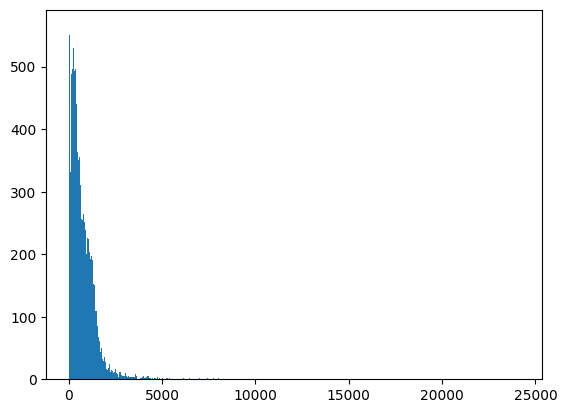

In [36]:
plt.hist([len(x) for x in X], bins = 1000)
plt.show()

In [141]:
nos = np.array([len(x) for x in X])
print("Number of words > 1500: ", len(nos[nos>1500]))
print("Number of words <= 1500: ", len(nos[nos<=1500]))

Number of words > 1500:  1899
Number of words <= 1500:  18901


In [142]:
X = pad_sequences(X, maxlen=1500)

In [143]:
vocab_size = len(tokenizer.word_index) + 1 # for unknown words
vocab = tokenizer.word_index

In [144]:
# Get the vectors
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, 100)) # 100 dimensions

    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]

    return weight_matrix

In [145]:
embedding_vectors = get_weight_matrix(w2v_model)
embedding_vectors.shape

(215050, 100)

# LSTM

In [146]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=1500, trainable=False))
model.add(LSTM(units=64))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1500, 100)         21505000  
                                                                 
 lstm_2 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21547561 (82.20 MB)
Trainable params: 42433 (165.75 KB)
Non-trainable params: 21505128 (82.04 MB)
________

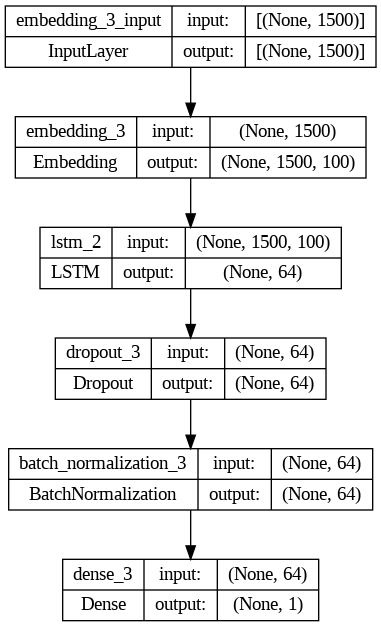

In [148]:
tf.keras.utils.plot_model(model, to_file='neuron_graph_LSTM.png', show_shapes=True)

## TRAIN

In [149]:
history = History()

In [150]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

fitting = model.fit(X_train, y_train, batch_size=32, validation_split=0.3, epochs=6)

Epoch 1/6
342/342 [==============================] - 24s 61ms/step - loss: 0.4229 - accuracy: 0.8008 - val_loss: 0.3300 - val_accuracy: 0.8536
Epoch 2/6
342/342 [==============================] - 21s 62ms/step - loss: 0.2465 - accuracy: 0.9049 - val_loss: 0.2663 - val_accuracy: 0.8823
Epoch 3/6
342/342 [==============================] - 18s 52ms/step - loss: 0.1978 - accuracy: 0.9247 - val_loss: 0.1787 - val_accuracy: 0.9318
Epoch 4/6
342/342 [==============================] - 19s 55ms/step - loss: 0.2159 - accuracy: 0.9126 - val_loss: 0.2192 - val_accuracy: 0.9137
Epoch 5/6
342/342 [==============================] - 18s 52ms/step - loss: 0.1418 - accuracy: 0.9481 - val_loss: 0.1504 - val_accuracy: 0.9470
Epoch 6/6
342/342 [==============================] - 20s 60ms/step - loss: 0.1054 - accuracy: 0.9643 - val_loss: 0.1161 - val_accuracy: 0.9575


In [152]:
train_loss = fitting.history['loss']
train_accuracy = fitting.history['accuracy']
val_loss = fitting.history['val_loss']
val_accuracy = fitting.history['val_accuracy']

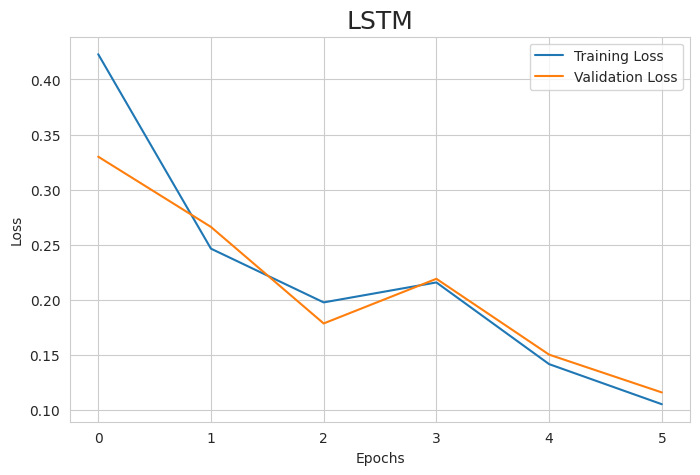

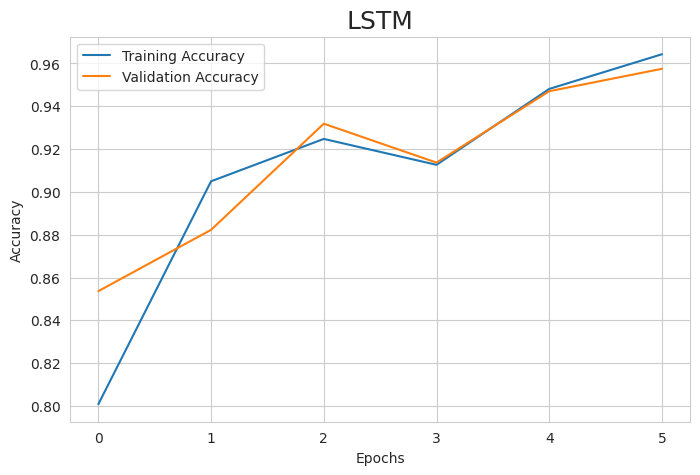

In [153]:
# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("LSTM",fontsize=18)
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("LSTM",fontsize=18)
plt.show()

In [154]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

163/163 [==============================] - 4s 20ms/step


In [155]:
accuracy_score(y_test, y_pred)

0.958076923076923

In [156]:
LSTM_accuracy = accuracy_score(y_test, y_pred).round(4)*100

In [157]:
confusion_matrix(y_test,y_pred)

array([[2504,   71],
       [ 147, 2478]])

In [158]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2575
           1       0.97      0.94      0.96      2625

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



## TEST

In [159]:
unseen_news_text = test['new_text'].tolist()

In [160]:
a = [unseen_news_text[0]]

In [161]:
x = tokenizer.texts_to_sequences(a)
x_padded = pad_sequences(x, maxlen=1500)

In [162]:
predictions = (model.predict(x_padded) >= 0.5).astype(int)

1/1 [==============================] - 0s 45ms/step


In [163]:
predictions

array([[0]])

In [164]:
x = tokenizer.texts_to_sequences(unseen_news_text)
x_padded = pad_sequences(x, maxlen=1500)

In [165]:
predictions = (model.predict(x_padded) >= 0.5).astype(int)

163/163 [==============================] - 4s 22ms/step


In [166]:
predictions

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [167]:
submit = pd.read_csv('submit.csv')

In [168]:
predict = predictions.tolist()

In [169]:
submit['predict_LSTM'] = predictions
submit.to_csv('submit.csv', index=False)

# LSTM Bidirectional


In [170]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=1500, trainable=False))
model_2.add(Bidirectional(LSTM(units=64)))
model_2.add(Dropout(0.3))
model_2.add(BatchNormalization())
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [171]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1500, 100)         21505000  
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               84480     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21590121 (82.36 MB)
Trainable params: 84

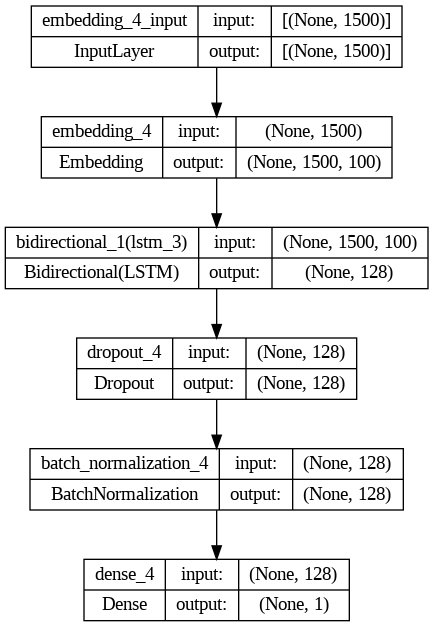

In [172]:
tf.keras.utils.plot_model(model_2, to_file='neuron_graph_Bidirectional_LSTM.png', show_shapes=True)

## TRAIN

In [173]:
history = History()

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

fitting = model_2.fit(X_train, y_train, batch_size=32, validation_split=0.3, epochs=6)

Epoch 1/6
342/342 [==============================] - 38s 102ms/step - loss: 0.4267 - accuracy: 0.8053 - val_loss: 0.3118 - val_accuracy: 0.8726
Epoch 2/6
342/342 [==============================] - 33s 98ms/step - loss: 0.2757 - accuracy: 0.8870 - val_loss: 0.2193 - val_accuracy: 0.9167
Epoch 3/6
342/342 [==============================] - 39s 114ms/step - loss: 0.1933 - accuracy: 0.9265 - val_loss: 0.1549 - val_accuracy: 0.9504
Epoch 4/6
342/342 [==============================] - 34s 100ms/step - loss: 0.1439 - accuracy: 0.9495 - val_loss: 0.1310 - val_accuracy: 0.9596
Epoch 5/6
342/342 [==============================] - 34s 99ms/step - loss: 0.1894 - accuracy: 0.9247 - val_loss: 0.1590 - val_accuracy: 0.9466
Epoch 6/6
342/342 [==============================] - 39s 113ms/step - loss: 0.1577 - accuracy: 0.9416 - val_loss: 0.1382 - val_accuracy: 0.9485


In [175]:
train_loss = fitting.history['loss']
train_accuracy = fitting.history['accuracy']
val_loss = fitting.history['val_loss']
val_accuracy = fitting.history['val_accuracy']

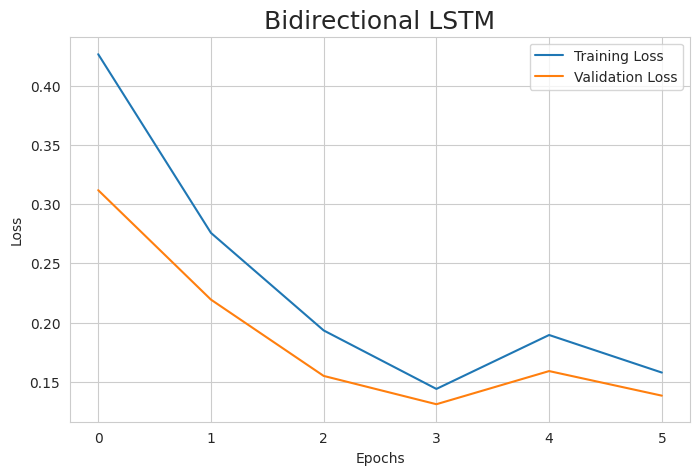

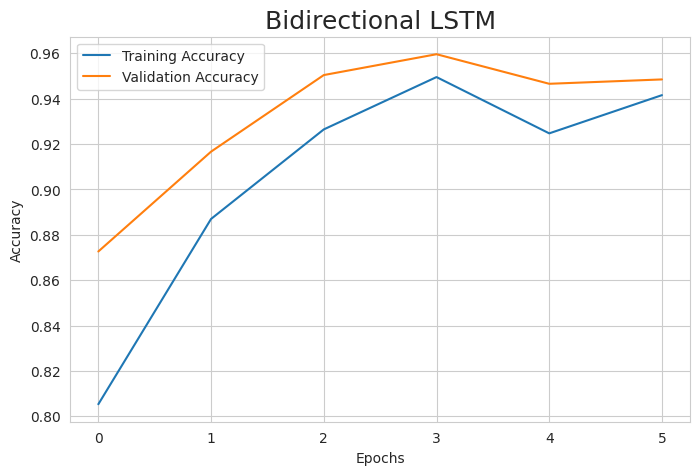

In [176]:
# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Bidirectional LSTM",fontsize=18)
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Bidirectional LSTM",fontsize=18)
plt.show()

In [177]:
y_pred = (model_2.predict(X_test) >= 0.5).astype(int)

163/163 [==============================] - 8s 42ms/step


In [178]:
accuracy_score(y_test, y_pred)

0.948076923076923

In [179]:
bi_LSTM_accuracy = accuracy_score(y_test, y_pred).round(4)*100

In [180]:
confusion_matrix(y_test,y_pred)

array([[2477,  106],
       [ 164, 2453]])

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2583
           1       0.96      0.94      0.95      2617

    accuracy                           0.95      5200
   macro avg       0.95      0.95      0.95      5200
weighted avg       0.95      0.95      0.95      5200



## TEST

In [182]:
x = tokenizer.texts_to_sequences(unseen_news_text)
x_padded = pad_sequences(x, maxlen=1500)

In [183]:
predictions = (model_2.predict(x_padded) >= 0.5).astype(int)

163/163 [==============================] - 6s 36ms/step


In [184]:
submit = pd.read_csv('submit.csv')

In [185]:
predict = predictions.tolist()

In [186]:
submit['predict_bi_LSTM'] = predictions
submit.to_csv('submit.csv', index=False)

# GRU

In [187]:
model_3 = Sequential()
model_3.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=1500, trainable=False))
model_3.add(GRU(units=64))
model_3.add(Dropout(0.3))
model_3.add(BatchNormalization())
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [188]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1500, 100)         21505000  
                                                                 
 gru_1 (GRU)                 (None, 64)                31872     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21537193 (82.16 MB)
Trainable params: 32065 (125.25 KB)
Non-trainable params: 21505128 (82.04 MB)
________

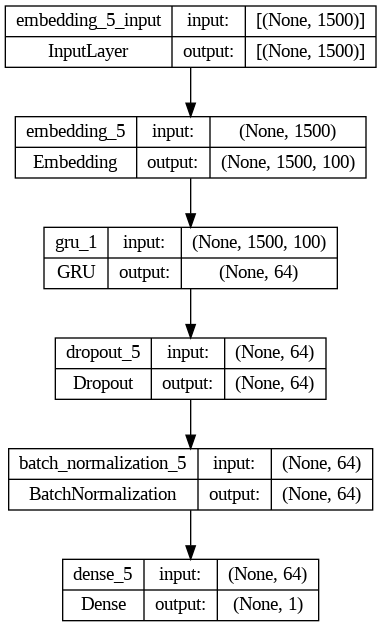

In [189]:
tf.keras.utils.plot_model(model_3, to_file='neuron_graph_GRU.png', show_shapes=True)

## TRAIN

In [190]:
history = History()

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

fitting = model_3.fit(X_train, y_train, batch_size=32, validation_split=0.3, epochs=6)

Epoch 1/6
342/342 [==============================] - 21s 52ms/step - loss: 0.4860 - accuracy: 0.7653 - val_loss: 0.9355 - val_accuracy: 0.6870
Epoch 2/6
342/342 [==============================] - 17s 50ms/step - loss: 0.2298 - accuracy: 0.9074 - val_loss: 0.1370 - val_accuracy: 0.9551
Epoch 3/6
342/342 [==============================] - 20s 59ms/step - loss: 0.1122 - accuracy: 0.9643 - val_loss: 0.0799 - val_accuracy: 0.9729
Epoch 4/6
342/342 [==============================] - 18s 51ms/step - loss: 0.0772 - accuracy: 0.9754 - val_loss: 0.0797 - val_accuracy: 0.9737
Epoch 5/6
342/342 [==============================] - 20s 58ms/step - loss: 0.0548 - accuracy: 0.9829 - val_loss: 0.0712 - val_accuracy: 0.9774
Epoch 6/6
342/342 [==============================] - 17s 51ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0692 - val_accuracy: 0.9774


In [192]:
train_loss = fitting.history['loss']
train_accuracy = fitting.history['accuracy']
val_loss = fitting.history['val_loss']
val_accuracy = fitting.history['val_accuracy']

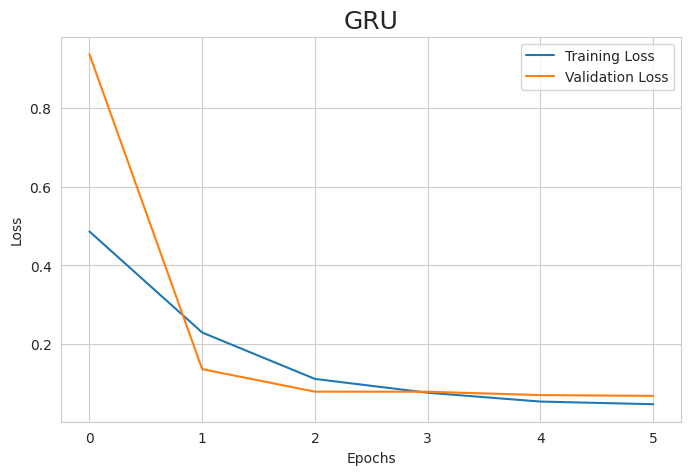

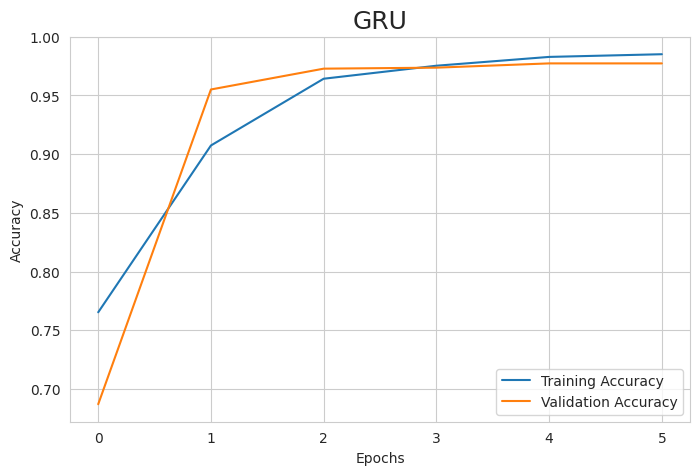

In [193]:
# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("GRU",fontsize=18)
plt.show()

# Plot training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("GRU",fontsize=18)
plt.show()

In [194]:
y_pred = (model_3.predict(X_test) >= 0.5).astype(int)

163/163 [==============================] - 3s 19ms/step


In [195]:
accuracy_score(y_test, y_pred)

0.9773076923076923

In [196]:
GRU_accuracy = accuracy_score(y_test, y_pred).round(4)*100

In [197]:
confusion_matrix(y_test,y_pred)

array([[2518,   89],
       [  29, 2564]])

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2607
           1       0.97      0.99      0.98      2593

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



## TEST

In [199]:
x = tokenizer.texts_to_sequences(unseen_news_text)
x_padded = pad_sequences(x, maxlen=1500)

In [200]:
predictions = (model_3.predict(x_padded) >= 0.5).astype(int)

163/163 [==============================] - 3s 19ms/step


In [201]:
submit = pd.read_csv('submit.csv')

In [202]:
predict = predictions.tolist()

In [203]:
submit['predict_GRU'] = predictions
submit.to_csv('submit.csv', index=False)

# Conclusion

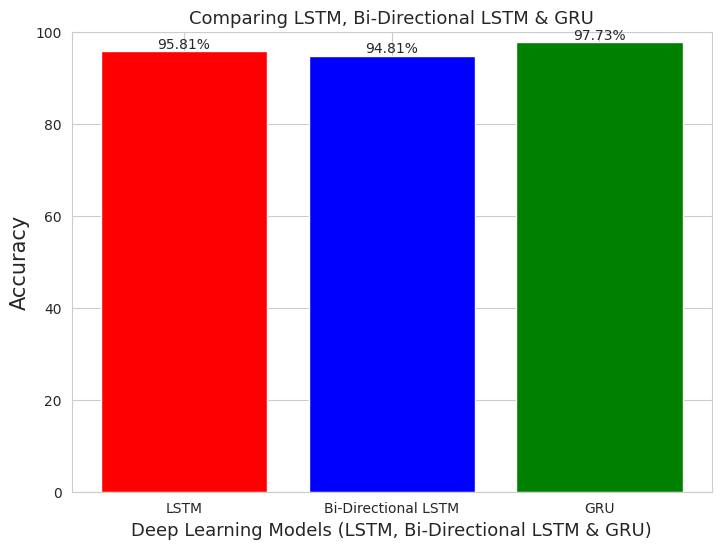

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

fig = plt.figure()
ax = fig.add_axes([0.5,0.5,0.8,0.92])
ax.set_ylim(0, 100)

Models = ['LSTM', 'Bi-Directional LSTM', 'GRU']
accuracy = [LSTM_accuracy, bi_LSTM_accuracy, GRU_accuracy]
colors = ['red','blue', 'green']
bars = ax.bar(Models, accuracy, color=colors)

plt.title("Comparing LSTM, Bi-Directional LSTM & GRU", fontsize=13)
plt.xlabel("Deep Learning Models (LSTM, Bi-Directional LSTM & GRU)", fontsize=13)
plt.ylabel("Accuracy", fontsize=15)

for bar, acc in zip(bars, accuracy):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()


# Inference

In [205]:
accuracy_LSTM = (submit['label'] == submit['predict_LSTM']).sum() * 100 / len(submit)

sentence_LSTM = f"The predicted results of LSTM is {accuracy_LSTM:.2f}% when compared with actual results."
sentence_LSTM

'The predicted results of LSTM is 64.44% when compared with actual results.'

In [206]:
accuracy_bi_LSTM = (submit['label'] == submit['predict_bi_LSTM']).sum() * 100 / len(submit)

sentence_bi_LSTM = f"The predicted results of Bidirectional LSTM is {accuracy_bi_LSTM:.2f}% when compared with actual results."
sentence_bi_LSTM

'The predicted results of Bidirectional LSTM is 64.56% when compared with actual results.'

In [207]:
accuracy_GRU = (submit['label'] == submit['predict_GRU']).sum() * 100 / len(submit)

sentence_GRU = f"The predicted results of GRU is {accuracy_GRU:.2f}% when compared with actual results."
sentence_GRU

'The predicted results of GRU is 63.98% when compared with actual results.'

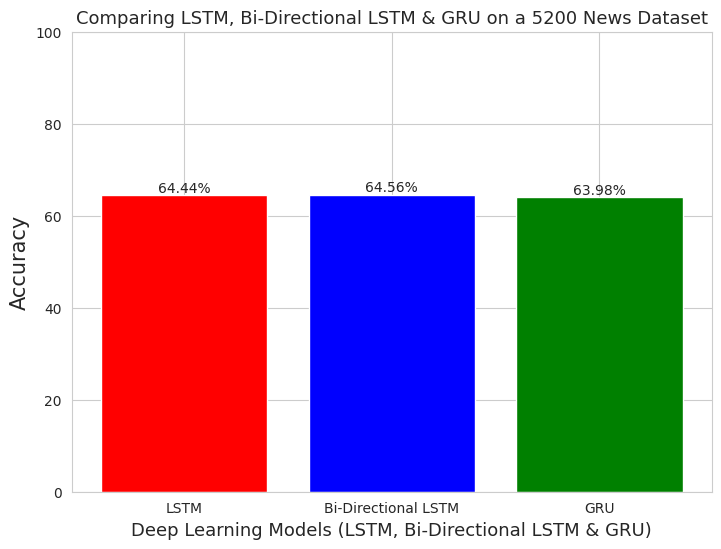

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

fig = plt.figure()
ax = fig.add_axes([0.5,0.5,0.8,0.92])
ax.set_ylim(0, 100)

Models = ['LSTM', 'Bi-Directional LSTM', 'GRU']
accuracy = [accuracy_LSTM, accuracy_bi_LSTM, accuracy_GRU]
colors = ['red','blue', 'green']
bars = ax.bar(Models, accuracy, color=colors)

plt.title("Comparing LSTM, Bi-Directional LSTM & GRU on a 5200 News Dataset", fontsize=13)
plt.xlabel("Deep Learning Models (LSTM, Bi-Directional LSTM & GRU)", fontsize=13)
plt.ylabel("Accuracy", fontsize=15)

for bar, acc in zip(bars, accuracy):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()